In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
from io import StringIO

In [26]:
#Load the dataset 
url="https://lib.stat.cmu.edu/datasets/boston"
raw_data=requests.get(url).text

In [27]:
#Data is in a fixed-width format: we'll process it accordingly 
data=[]
for line in raw_data.split("\n")[22:]:
    if line.strip():
        data.append(line.split())

In [39]:
#Convert the lists of lists into a DataFrame
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX" , "RM", "AGE", "DIS", "RAD", "PTRATION",  "MEDV"]
df=pd.DataFrame(data, columns=column_names)
df=df.apply(pd.to_numeric)

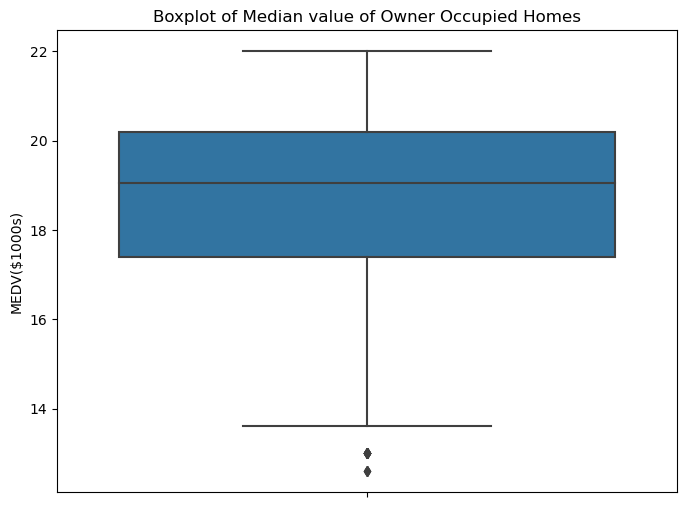

In [32]:
# 1. Boxplot for the Median Value of Owner Occupied Homes
plt.figure(figsize=(8,6))
sns.boxplot(y=df["MEDV"])
plt.title("Boxplot of Median value of Owner Occupied Homes")
plt.ylabel("MEDV($1000s)")
plt.show()

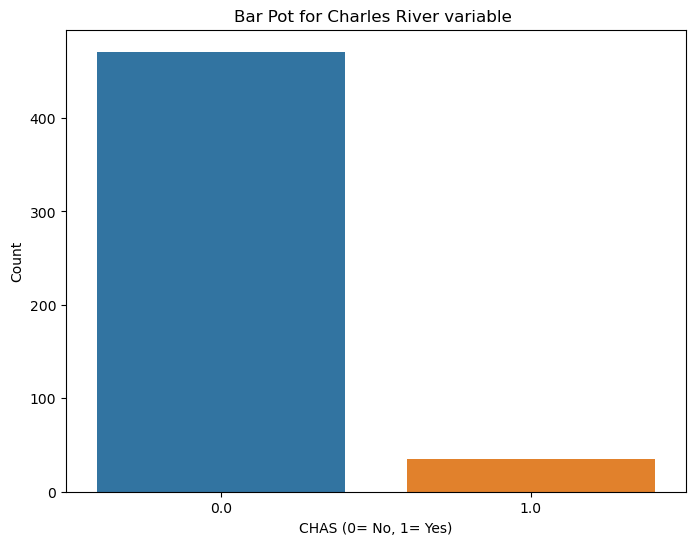

In [35]:
# 2. Bar Pot for Charles River variable 
plt.figure(figsize=(8,6))
sns.countplot(x=df["CHAS"])
plt.title("Bar Pot for Charles River variable ")
plt.xlabel("CHAS (0= No, 1= Yes)")
plt.ylabel("Count")
plt.show()

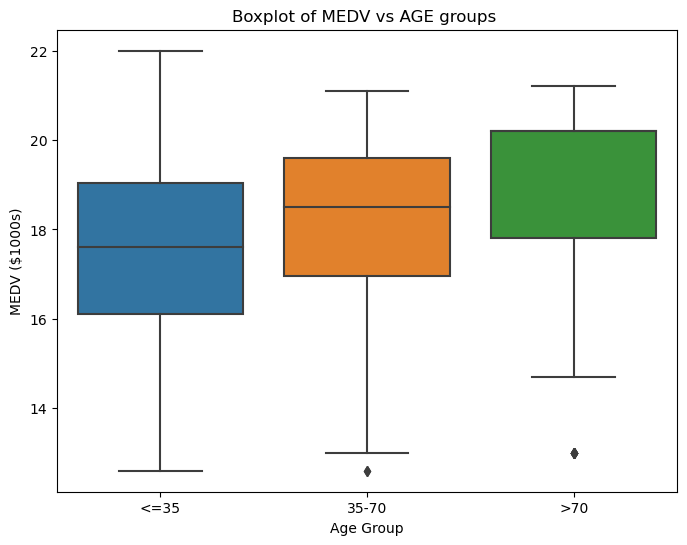

In [37]:
# 3. Boxplot of MEDV vs AGE groups 
df["AGE_GROUP"]= pd.cut(df["AGE"], bins=[0,35,70,100], labels=["<=35", "35-70", ">70"])
plt.figure(figsize=(8,6))
sns.boxplot(x=df["AGE_GROUP"], y=df["MEDV"])
plt.title("Boxplot of MEDV vs AGE groups ")
plt.xlabel("Age Group")
plt.ylabel("MEDV ($1000s)")
plt.show()

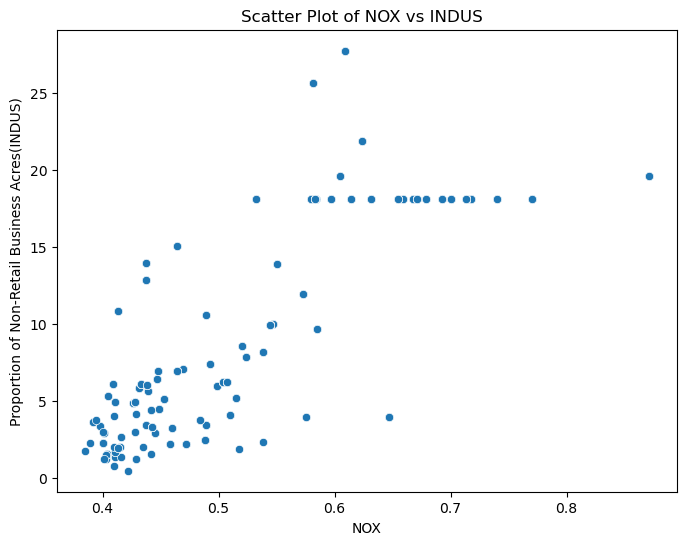

In [40]:
# 4. Scatter Plot of NOX vs INDUS 
plt.figure(figsize=(8,6))
sns.scatterplot(x=df["NOX"], y=df["INDUS"])
plt.title("Scatter Plot of NOX vs INDUS  ")
plt.xlabel("NOX")
plt.ylabel("Proportion of Non-Retail Business Acres(INDUS)")
plt.show()

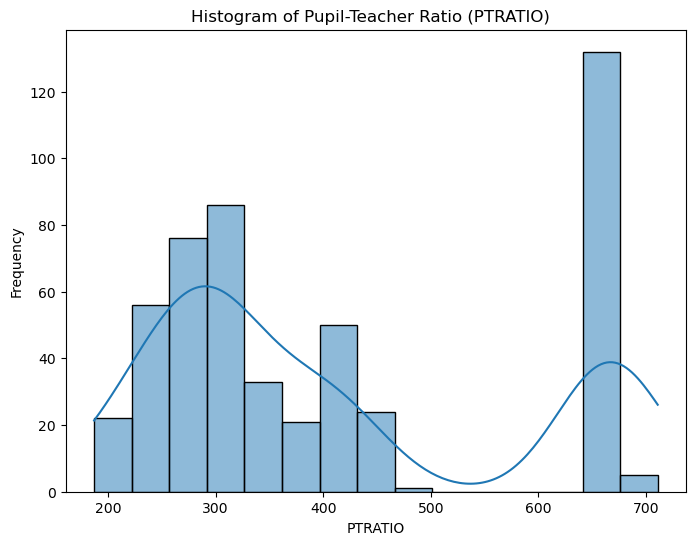

In [41]:
# 5. Histogram of Pupil-Teacher Ratio (PTRATIO)
plt.figure(figsize=(8,6))
sns.histplot(df["PTRATION"], bins=15, kde=True)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)  ")
plt.xlabel("PTRATIO")
plt.ylabel("Frequency")
plt.show()

In [42]:
# Q1. 
import scipy.stats as stats 

#split data into two groups based on the "CHAS" column (1=near river, 0= not near river)
group1=df[df["CHAS"]==1]["MEDV"]
group2=df[df["CHAS"]==0]["MEDV"]

#PERFORM independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2, equal_var = False)

print(f"T-stat: {t_stat}, P-value: {p_value}")

if p_value <0.05:
    print("Reject H0: There is a significant difference in house prices")
else: 
    print("Fail to Reject H0: No significant difference in house prices")
      

T-stat: -2.8327248854996325, P-value: 0.007222254905988093
Reject H0: There is a significant difference in house prices


In [45]:
# Q2.
df["AGE_Group"] = pd.cut(df["AGE"], bins=[0,40,80,100], labels = ["Young", "Middle-aged", "Old"])

#Perform ANOVA 
anova_result = stats.f_oneway(
    df[df["AGE_Group"]=="Young"]["MEDV"],
    df[df["AGE_Group"]=="Middle-aged"]["MEDV"],
    df[df["AGE_Group"]=="Old"]["MEDV"]
)

print(f"F-stat: {anova_result.statistic}, P-value: {anova_result.pvalue}")

if anova_result.pvalue <0.05:
    print("Reject H0: there is a significant difference in house prices among age groups ")
else:
    print("Fail to reject H0: No significant difference")


F-stat: 19.674692582388797, P-value: 5.931185059529917e-09
Reject H0: there is a significant difference in house prices among age groups 


In [48]:
# Q3. 

df=df[["NOX", "INDUS"]].dropna()
#Compute Pearson Correlation
correlation, p_value = stats.pearsonr(df["NOX"], df["INDUS"])

print(f"Pearson Correlation: {correlation}, P-value:{p_value}")

if p_value < 0.05:
    print("Reject H0: there is a significant correlation")
    
else: 
    print("Fail to reject H0: No significant difference")

Pearson Correlation: 0.7636514469209162, P-value:7.913361061232958e-98
Reject H0: there is a significant correlation


In [54]:
# Q4.
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX" , "RM", "AGE", "DIS", "RAD", "PTRATION",  "MEDV"]
df=pd.DataFrame(data, columns=column_names)
df=df.apply(pd.to_numeric)


import statsmodels.api as sm
df=df[["DIS", "MEDV"]].dropna()
#define independent and dependent variables 
X=df["DIS"]
y=df["MEDV"]

X=sm.add_constant(X)
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     28.79
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           1.23e-07
Time:                        13:13:47   Log-Likelihood:                -1094.3
No. Observations:                 506   AIC:                             2193.
Df Residuals:                     504   BIC:                             2201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.3626      0.193    100.184      0.0